In [ ]:
# Author :
# ID :
# yebbleLife_base.py - Basic simulation of wildlife

!pip install ipython
from IPython.display import HTML
from IPython.display import display
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import colors

from google.colab import drive
drive.mount('/content/drive')

#world area
RMAX  = 20
CMAX  = 20
water_source = 50
tree = 25
# cave = 500

echidna_line_of_sight = 1
koala_line_of_sight = 2
dingo_line_of_sight = 3

#initial animal count
POP_echidna   = 7
POP_koala   = 6
POP_dingo   = 6
#number of turns
STEPS = 1000
    
# def main():

snapshots = []
    
    


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



 ### 2D Growth Simulation ###

Water Source at : [ 1 3 ]
Water Source at : [ 4 18 ]
Water Source at : [ 7 8 ]
Water Source at : [ 0 18 ]
Water Source at : [ 2 7 ]
Water Source at : [ 13 6 ]
Water Source at : [ 19 5 ]
Water Source at : [ 14 19 ]
Water Source at : [ 15 7 ]
Water Source at : [ 8 10 ]
Water Source at : [ 17 12 ]
Water Source at : [ 1 4 ]
Water Source at : [ 10 2 ]
Water Source at : [ 10 6 ]
Water Source at : [ 4 14 ]
Water Source at : [ 6 18 ]
Water Source at : [ 2 4 ]
Water Source at : [ 5 3 ]
Water Source at : [ 9 12 ]
Water Source at : [ 6 2 ]
Water Source at : [ 17 13 ]
Water Source at : [ 16 13 ]
Water Source at : [ 19 10 ]
Water Source at : [ 11 11 ]
Water Source at : [ 3 8 ]
Water Source at : [ 2 18 ]
Water Source at : [ 4 13 ]
Water Source at : [ 1 11 ]
Water Source at : [ 15 19 ]
Water Source at : [ 3 13 ]
Water Source at : [ 1 2 ]
Water Source at : [ 10 12 ]
Water Source at : [ 15 7 ]
Water Source at : [ 6 11 ]
Water Source at : [ 8 19 ]
Water Source at : [ 14 8

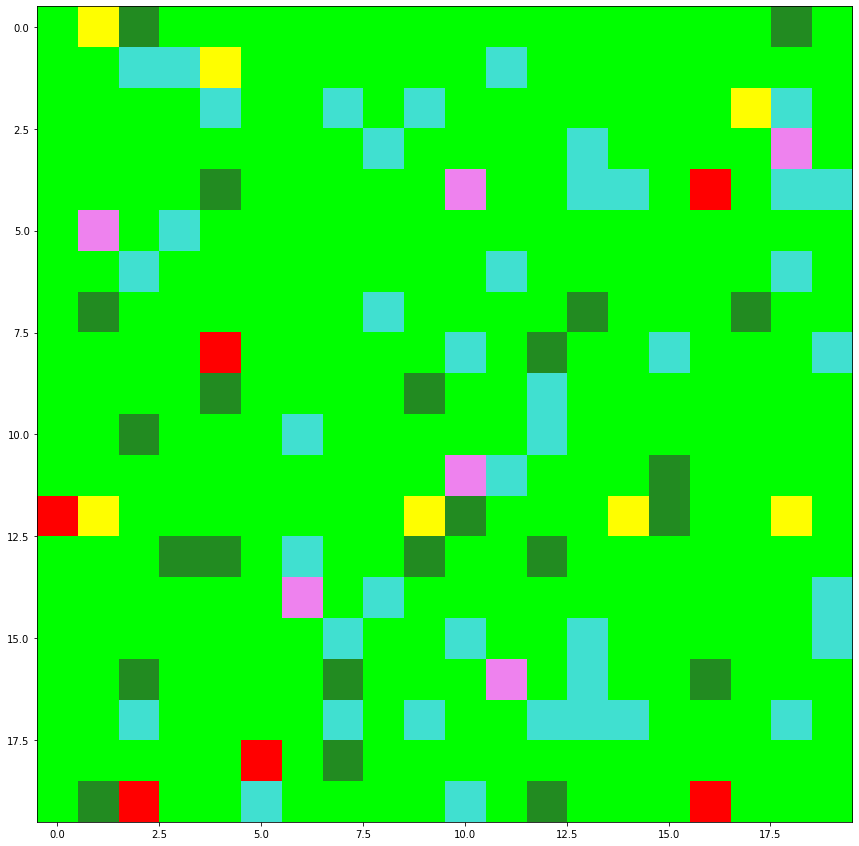

Echidna count :  7  Koala count :  6  Dingo count :  6


In [ ]:
print("\n ### 2D Growth Simulation ###\n")
# Init world
water_source_l_r = [random.randrange(0, RMAX, 1) for i in range(water_source)]
water_source_l_c = [random.randrange(0, CMAX, 1) for i in range(water_source)]

tree_l_r = [random.randrange(0, RMAX, 1) for i in range(tree)]
tree_l_c = [random.randrange(0, CMAX, 1) for i in range(tree)]
    
# Initialise population

popgrid = np.zeros((RMAX, CMAX), dtype=int)
#animal status
animal_type = []
animal_position_r = []
animal_position_c = []
animal_travel=[]
#nextgrid = np.zeros((RMAX, CMAX), dtype=int)
animal_hunger = []
# water and tree sources
for i in range(water_source):
    popgrid[water_source_l_r[i],water_source_l_c[i]] = 1
    print("Water Source at : [", water_source_l_r[i], water_source_l_c[i], "]")

for i in range(tree):
    popgrid[tree_l_r[i],tree_l_c[i]] = 2
    print("Tree Food Source at : [", tree_l_r[i], tree_l_c[i], "]")

#initializing positions of the animals
for i in range(POP_echidna):
    randR = random.randint(0,RMAX-1)
    randC = random.randint(0,CMAX-1)
    popgrid[randR,randC] = 3
    animal_type.append("echidna")
    animal_position_r.append(randR)
    animal_position_c.append(randC)
    animal_travel.append(0)
    animal_hunger.append(0)
    print("Echidna Life at : [", randR, randC, "]")

for i in range(POP_koala):
    randR = random.randint(0,RMAX-1)
    randC = random.randint(0,CMAX-1)
    popgrid[randR,randC] = 4
    animal_type.append("koala")
    animal_position_r.append(randR)
    animal_position_c.append(randC)
    animal_travel.append(0)
    animal_hunger.append(0)
    print("Koala Life at : [", randR, randC, "]")

for i in range(POP_dingo):
    randR = random.randint(0,RMAX-1)
    randC = random.randint(0,CMAX-1)
    popgrid[randR,randC] = 5
    animal_type.append("dingo")
    animal_position_r.append(randR)
    animal_position_c.append(randC)
    animal_travel.append(0)
    animal_hunger.append(0)
    print("Dingo Life at : [", randR, randC, "]")

#print(animal_type)
print("\n ### INITIAL POPULATION ###")
plt.figure(figsize=(15,15))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lime","turquoise","forestgreen","yellow","violet","red"])
plt.imshow(popgrid, cmap = cmap)   # Note plt origin is top left
snapshots.append(popgrid)
plt.show()

echidna_count=0
koala_count=0
dingo_count=0
for i in range(0,len(animal_type)):
    if(animal_type[i]=="echidna"):
        echidna_count+=1
    if (animal_type[i] == "koala"):
        koala_count += 1
    if (animal_type[i] == "dingo"):
        dingo_count += 1
print("Echidna count : ",echidna_count," Koala count : ",koala_count," Dingo count : ",dingo_count)


 ### TIMESTEP  1 ###
echidna moved to : [  0 1  ] tiredness :  0  hunger :  0
echidna moved to : [  13 18  ] tiredness :  1  hunger :  1
echidna moved to : [  12 14  ] tiredness :  0  hunger :  0
echidna moved to : [  13 9  ] tiredness :  1  hunger :  1
echidna moved to : [  1 3  ] tiredness :  1  hunger :  1
echidna moved to : [  3 17  ] tiredness :  1  hunger :  1
echidna got frightened at position :  [12, 0]
echidna moved to : [  12 2  ] tiredness :  1  hunger :  1
koala moved to : [  4 10  ] tiredness :  0  hunger :  0
koala moved to : [  10 11  ] tiredness :  2  hunger :  2
koala moved to : [  5 2  ] tiredness :  1  hunger :  1
koala moved to : [  15 11  ] tiredness :  1  hunger :  1
koala moved to : [  13 6  ] tiredness :  1  hunger :  1
koala moved to : [  4 17  ] tiredness :  2  hunger :  2
dingo moved to : [  18 5  ] tiredness :  0  hunger :  0
dingo moved to : [  16 13  ] tiredness :  6  hunger :  6
dingo moved to : [  9 3  ] tiredness :  6  hunger :  6
dingo moved to : [  1

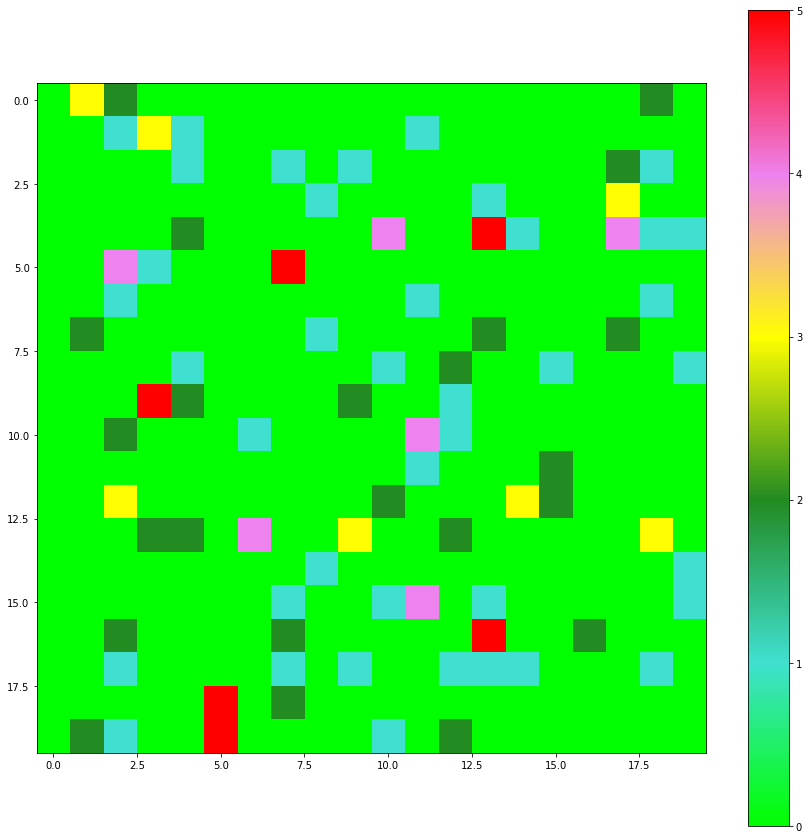

Echidna count :  7  Koala count :  6  Dingo count :  6

 ### TIMESTEP  2 ###
echidna moved to : [  1 1  ] tiredness :  1  hunger :  1
echidna moved to : [  14 18  ] tiredness :  2  hunger :  2
echidna moved to : [  12 15  ] tiredness :  1  hunger :  1
echidna moved to : [  14 9  ] tiredness :  2  hunger :  2
echidna moved to : [  0 3  ] tiredness :  2  hunger :  2
echidna moved to : [  4 17  ] tiredness :  2  hunger :  2
echidna moved to : [  11 2  ] tiredness :  2  hunger :  2
koala moved to : [  5 11  ] tiredness :  2  hunger :  2
koala moved to : [  11 11  ] tiredness :  3  hunger :  3
koala moved to : [  6 2  ] tiredness :  2  hunger :  2
koala moved to : [  15 12  ] tiredness :  2  hunger :  2
koala moved to : [  13 6  ] tiredness :  1  hunger :  1
koala moved to : [  4 16  ] tiredness :  3  hunger :  3
dingo moved to : [  15 2  ] tiredness :  6  hunger :  6
dingo moved to : [  19 10  ] tiredness :  12  hunger :  12
dingo moved to : [  9 3  ] tiredness :  6  hunger :  6
dingo move

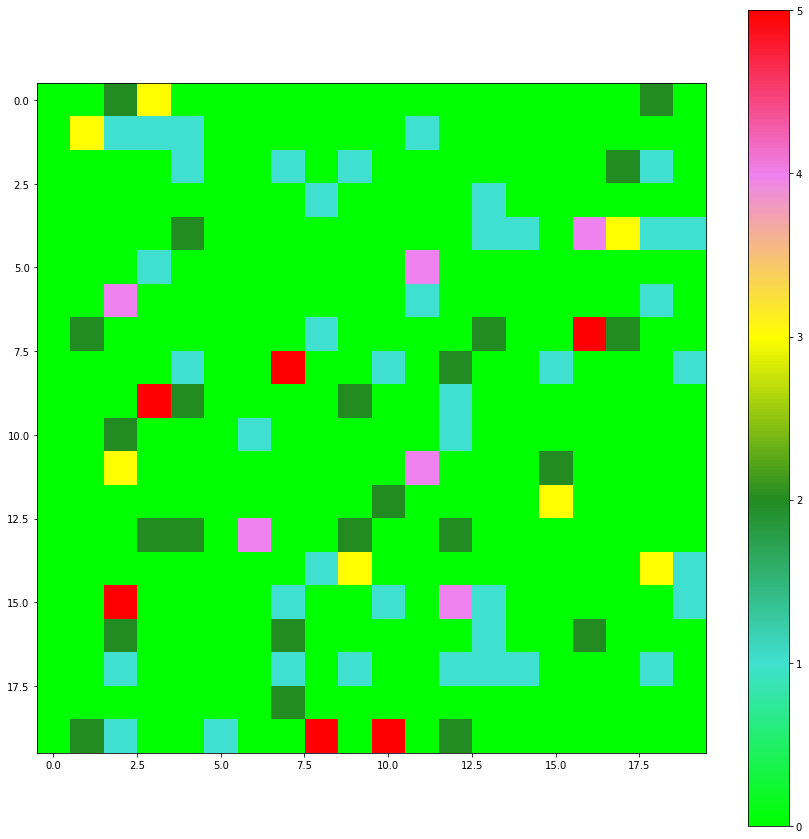

Echidna count :  7  Koala count :  6  Dingo count :  6

 ### TIMESTEP  3 ###
echidna moved to : [  0 1  ] tiredness :  2  hunger :  2
echidna moved to : [  15 18  ] tiredness :  3  hunger :  3
echidna moved to : [  13 15  ] tiredness :  2  hunger :  2
echidna moved to : [  13 9  ] tiredness :  3  hunger :  3
echidna moved to : [  0 3  ] tiredness :  2  hunger :  2
echidna moved to : [  5 17  ] tiredness :  3  hunger :  3
echidna moved to : [  11 3  ] tiredness :  3  hunger :  3
koala moved to : [  5 12  ] tiredness :  3  hunger :  3
koala moved to : [  11 10  ] tiredness :  4  hunger :  4
koala moved to : [  7 2  ] tiredness :  3  hunger :  3
koala moved to : [  14 11  ] tiredness :  4  hunger :  4
koala moved to : [  12 6  ] tiredness :  2  hunger :  2
koala moved to : [  3 15  ] tiredness :  5  hunger :  5
dingo moved to : [  18 5  ] tiredness :  12  hunger :  12
dingo sleeping at : [  19 10  ]
dingo moved to : [  9 3  ] tiredness :  6  hunger :  6
dingo moved to : [  19 8  ] tiredne

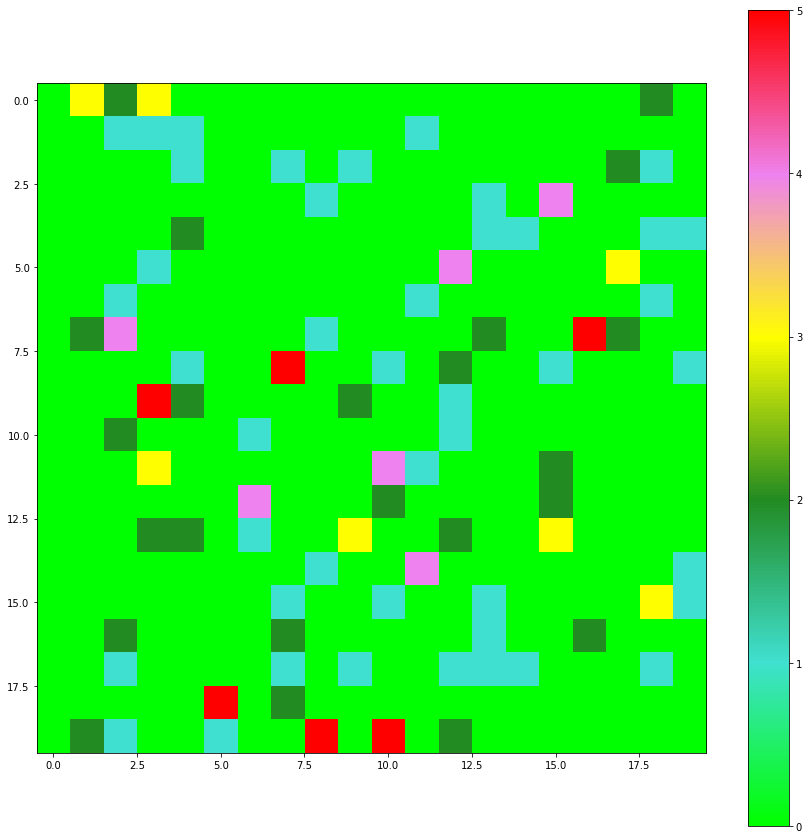

Echidna count :  7  Koala count :  6  Dingo count :  6

 ### TIMESTEP  4 ###
echidna moved to : [  1 1  ] tiredness :  3  hunger :  3
echidna moved to : [  14 18  ] tiredness :  4  hunger :  4
echidna moved to : [  12 15  ] tiredness :  3  hunger :  3
echidna moved to : [  14 9  ] tiredness :  4  hunger :  4
echidna moved to : [  1 3  ] tiredness :  3  hunger :  3
echidna moved to : [  5 18  ] tiredness :  4  hunger :  4
echidna moved to : [  10 3  ] tiredness :  4  hunger :  4
koala moved to : [  4 12  ] tiredness :  4  hunger :  4
koala moved to : [  11 11  ] tiredness :  5  hunger :  5
koala moved to : [  8 2  ] tiredness :  4  hunger :  4
koala moved to : [  13 10  ] tiredness :  6  hunger :  6
koala moved to : [  12 6  ] tiredness :  2  hunger :  2
koala moved to : [  4 15  ] tiredness :  6  hunger :  6
dingo sleeping at : [  18 5  ]
dingo moved to : [  16 10  ] tiredness :  3  hunger :  15
dingo moved to : [  9 3  ] tiredness :  6  hunger :  6
dingo moved to : [  16 11  ] tiredne

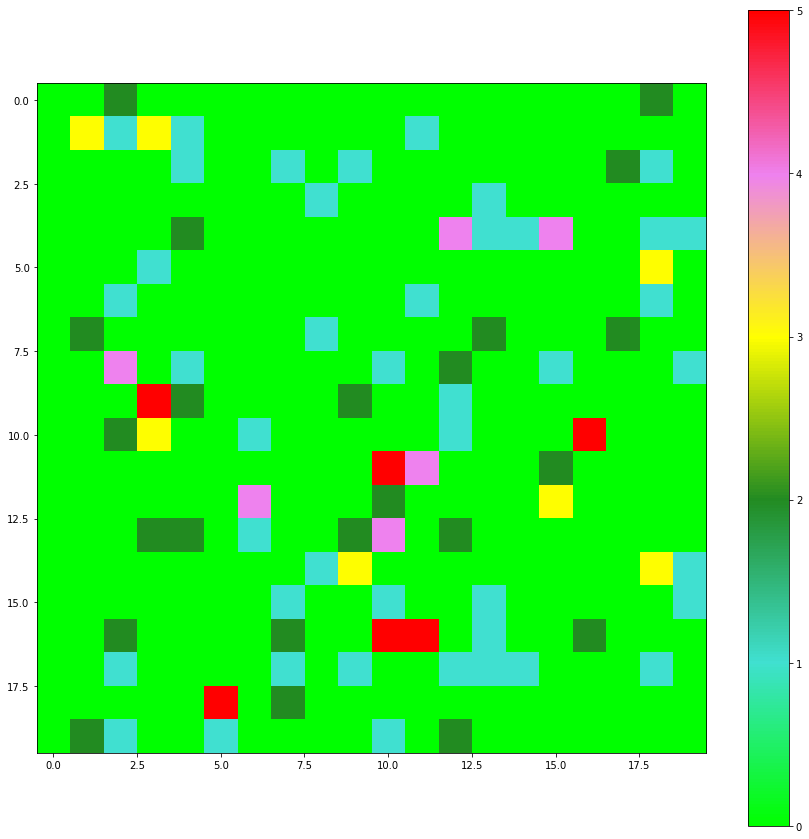

Echidna count :  6  Koala count :  5  Dingo count :  7

 ### TIMESTEP  5 ###
echidna moved to : [  1 2  ] tiredness :  4  hunger :  4
echidna moved to : [  14 17  ] tiredness :  5  hunger :  5
echidna moved to : [  12 14  ] tiredness :  4  hunger :  4
echidna moved to : [  13 9  ] tiredness :  5  hunger :  5
echidna moved to : [  0 3  ] tiredness :  4  hunger :  4
echidna moved to : [  4 18  ] tiredness :  5  hunger :  5
koala moved to : [  5 12  ] tiredness :  5  hunger :  5
koala moved to : [  9 3  ] tiredness :  6  hunger :  6
koala moved to : [  13 11  ] tiredness :  7  hunger :  7
koala moved to : [  13 6  ] tiredness :  3  hunger :  3
koala moved to : [  4 15  ] tiredness :  6  hunger :  6
dingo moved to : [  15 2  ] tiredness :  6  hunger :  18
dingo moved to : [  13 7  ] tiredness :  9  hunger :  21
dingo moved to : [  12 6  ] tiredness :  12  hunger :  6
dingo sleeping at : [  16 11  ]
dingo moved to : [  10 16  ] tiredness :  3  hunger :  12
dingo moved to : [  11 7  ] tiredn

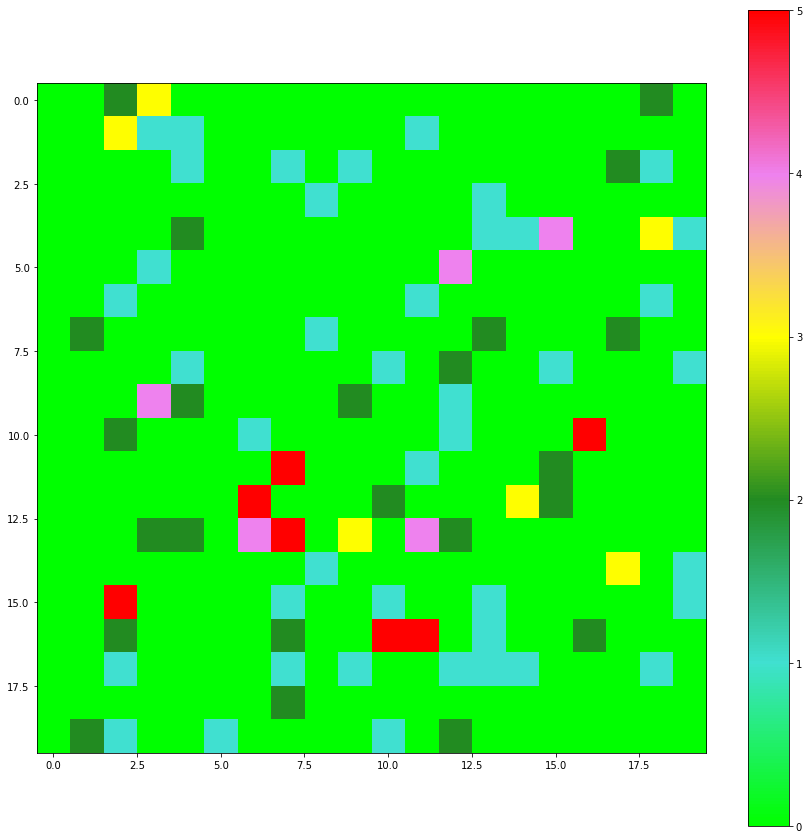

Echidna count :  6  Koala count :  4  Dingo count :  7

 ### TIMESTEP  6 ###
echidna moved to : [  1 2  ] tiredness :  4  hunger :  4
echidna moved to : [  14 16  ] tiredness :  6  hunger :  6
echidna moved to : [  13 14  ] tiredness :  5  hunger :  5
echidna moved to : [  14 9  ] tiredness :  6  hunger :  6
echidna moved to : [  0 2  ] tiredness :  5  hunger :  5
echidna moved to : [  5 18  ] tiredness :  6  hunger :  6
koala moved to : [  6 12  ] tiredness :  6  hunger :  6
koala moved to : [  10 4  ] tiredness :  8  hunger :  8
koala moved to : [  14 12  ] tiredness :  9  hunger :  9
koala moved to : [  3 14  ] tiredness :  8  hunger :  8
dingo moved to : [  15 0  ] tiredness :  8  hunger :  20
dingo sleeping at : [  13 7  ]
dingo sleeping at : [  12 6  ]
dingo moved to : [  13 14  ] tiredness :  6  hunger :  18
dingo moved to : [  10 13  ] tiredness :  6  hunger :  15
dingo sleeping at : [  11 7  ]
dingo moved to : [  19 13  ] tiredness :  6  hunger :  6
echidna  in position :  13 

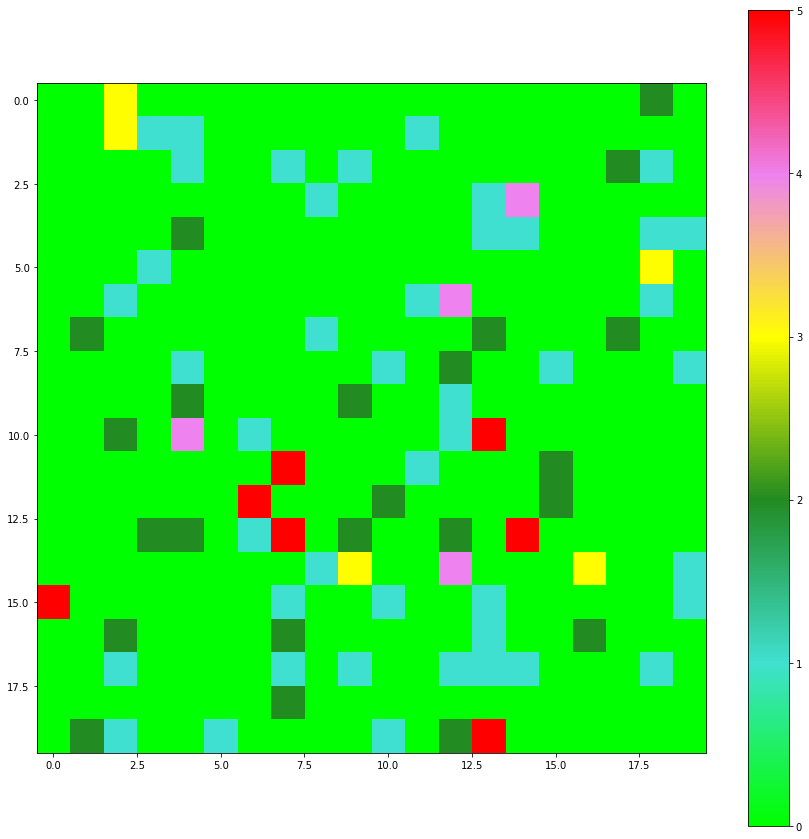

Echidna count :  5  Koala count :  4  Dingo count :  7

 ### TIMESTEP  7 ###
echidna moved to : [  2 2  ] tiredness :  5  hunger :  5
echidna moved to : [  15 16  ] tiredness :  7  hunger :  7
echidna moved to : [  14 9  ] tiredness :  6  hunger :  6
echidna moved to : [  0 2  ] tiredness :  5  hunger :  5
echidna moved to : [  5 17  ] tiredness :  7  hunger :  7
koala moved to : [  6 12  ] tiredness :  6  hunger :  6
koala moved to : [  11 4  ] tiredness :  9  hunger :  9
koala sleeping at : [  14 12  ]
koala moved to : [  4 15  ] tiredness :  10  hunger :  10
dingo moved to : [  15 3  ] tiredness :  11  hunger :  23
dingo moved to : [  13 10  ] tiredness :  3  hunger :  3
dingo moved to : [  9 6  ] tiredness :  3  hunger :  3
dingo moved to : [  10 11  ] tiredness :  12  hunger :  6
dingo moved to : [  13 13  ] tiredness :  9  hunger :  18
dingo moved to : [  14 10  ] tiredness :  6  hunger :  9
dingo moved to : [  19 13  ] tiredness :  6  hunger :  6
dingo  is dead from hunger in po

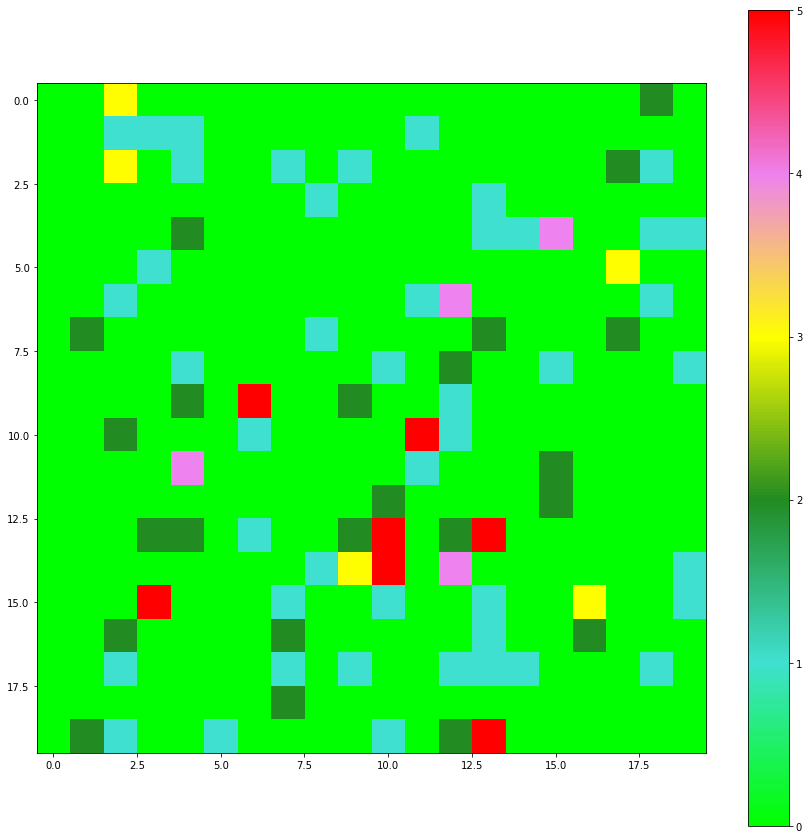

Echidna count :  4  Koala count :  3  Dingo count :  6

 ### TIMESTEP  8 ###
echidna moved to : [  2 1  ] tiredness :  6  hunger :  6
echidna moved to : [  15 17  ] tiredness :  8  hunger :  8
echidna moved to : [  0 2  ] tiredness :  5  hunger :  5
echidna moved to : [  5 17  ] tiredness :  7  hunger :  7
koala moved to : [  5 11  ] tiredness :  8  hunger :  8
koala sleeping at : [  11 4  ]
koala moved to : [  13 12  ] tiredness :  1  hunger :  10
dingo moved to : [  16 13  ] tiredness :  9  hunger :  6
dingo moved to : [  9 9  ] tiredness :  6  hunger :  6
dingo sleeping at : [  10 11  ]
dingo sleeping at : [  13 13  ]
dingo moved to : [  14 10  ] tiredness :  6  hunger :  0
dingo moved to : [  19 10  ] tiredness :  9  hunger :  9
koala  in position :  13 12  is dead by dingo from position :  13 13


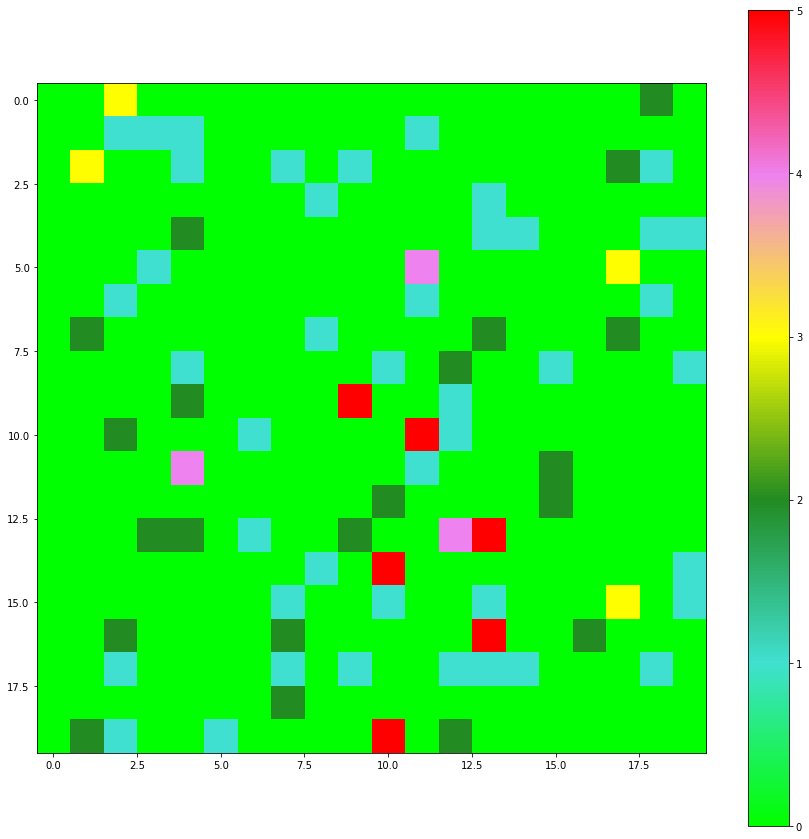

Echidna count :  4  Koala count :  2  Dingo count :  6

 ### TIMESTEP  9 ###
echidna moved to : [  1 1  ] tiredness :  7  hunger :  7
echidna moved to : [  16 17  ] tiredness :  9  hunger :  9
echidna moved to : [  1 2  ] tiredness :  6  hunger :  6
echidna moved to : [  6 17  ] tiredness :  8  hunger :  8
koala moved to : [  5 12  ] tiredness :  9  hunger :  9
koala moved to : [  10 4  ] tiredness :  1  hunger :  10
dingo sleeping at : [  16 13  ]
dingo moved to : [  9 9  ] tiredness :  6  hunger :  6
dingo moved to : [  13 11  ] tiredness :  3  hunger :  9
dingo moved to : [  10 10  ] tiredness :  6  hunger :  6
dingo moved to : [  11 10  ] tiredness :  9  hunger :  3
dingo sleeping at : [  19 10  ]


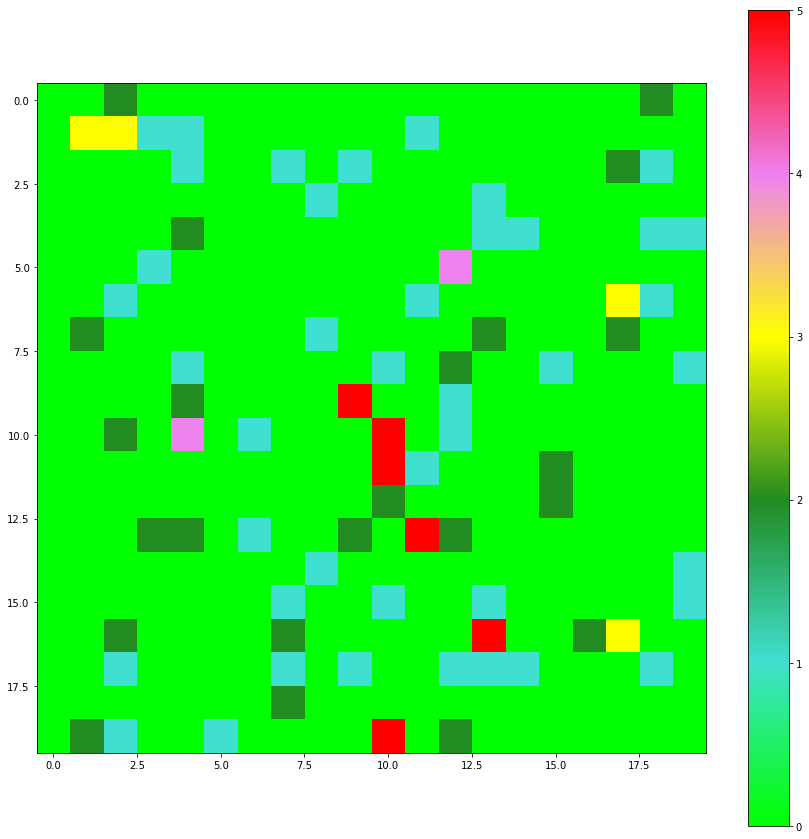

Echidna count :  4  Koala count :  2  Dingo count :  6

 ### TIMESTEP  10 ###
echidna moved to : [  0 1  ] tiredness :  8  hunger :  8
echidna sleeping at : [  16 17  ]
echidna moved to : [  2 2  ] tiredness :  7  hunger :  7
echidna moved to : [  6 18  ] tiredness :  9  hunger :  9
koala sleeping at : [  5 12  ]
echidna successfully got food for hunger at position :  [9, 4]
koala moved to : [  9 4  ] tiredness :  2  hunger :  1
dingo moved to : [  16 16  ] tiredness :  3  hunger :  9
dingo moved to : [  12 9  ] tiredness :  9  hunger :  9
dingo moved to : [  16 8  ] tiredness :  9  hunger :  15
dingo moved to : [  10 13  ] tiredness :  9  hunger :  9
dingo sleeping at : [  11 10  ]
dingo moved to : [  19 10  ] tiredness :  0  hunger :  9
echidna  in position :  16 17  is dead by dingo from position :  16 16


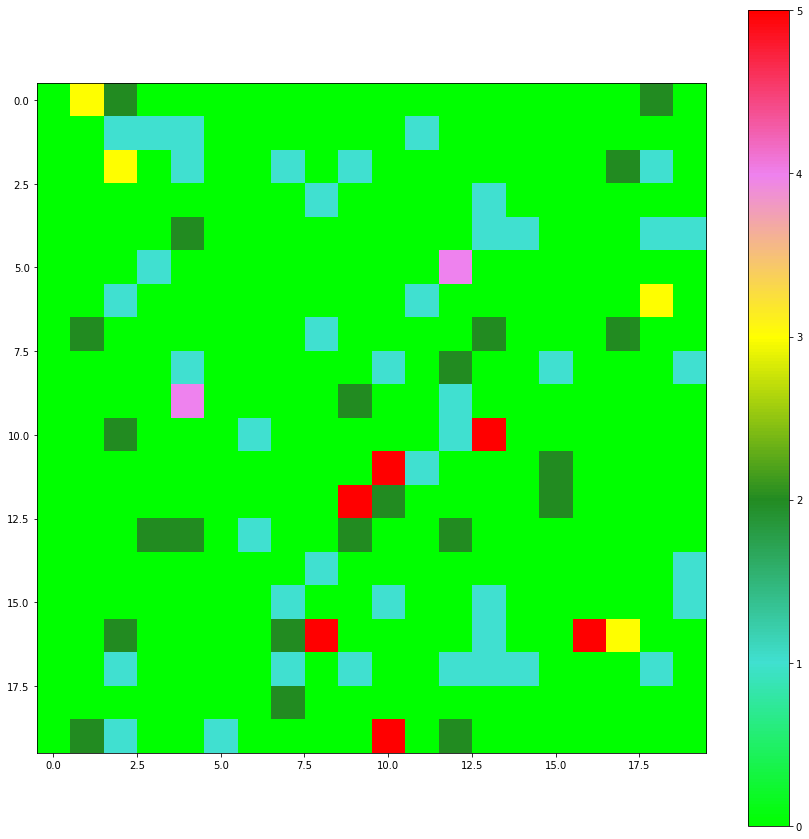

Echidna count :  3  Koala count :  2  Dingo count :  6

 ### TIMESTEP  11 ###
echidna moved to : [  1 1  ] tiredness :  9  hunger :  9
echidna moved to : [  1 2  ] tiredness :  8  hunger :  8
echidna sleeping at : [  6 18  ]
koala moved to : [  6 11  ] tiredness :  2  hunger :  11
koala moved to : [  8 5  ] tiredness :  4  hunger :  3
dingo moved to : [  16 19  ] tiredness :  6  hunger :  3
dingo sleeping at : [  12 9  ]
dingo sleeping at : [  16 8  ]
dingo sleeping at : [  10 13  ]
dingo moved to : [  11 7  ] tiredness :  3  hunger :  6
dingo moved to : [  16 7  ] tiredness :  6  hunger :  15


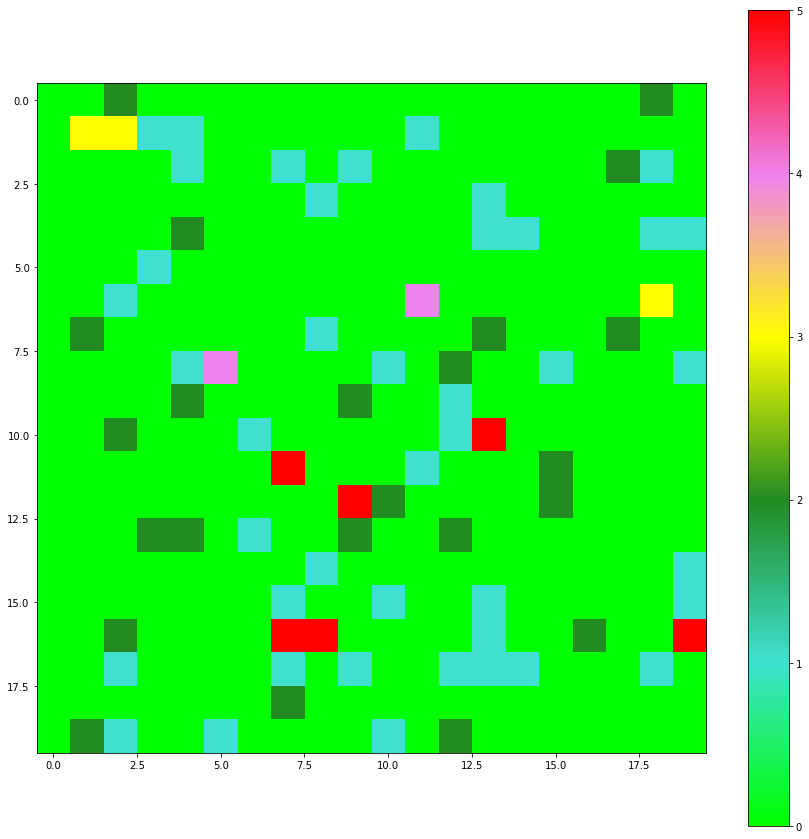

Echidna count :  3  Koala count :  2  Dingo count :  6

 ### TIMESTEP  12 ###
echidna sleeping at : [  1 1  ]
echidna moved to : [  1 1  ] tiredness :  9  hunger :  9
echidna moved to : [  7 18  ] tiredness :  1  hunger :  10
koala moved to : [  5 10  ] tiredness :  4  hunger :  13
koala moved to : [  7 6  ] tiredness :  6  hunger :  5
dingo moved to : [  16 19  ] tiredness :  6  hunger :  3
dingo moved to : [  12 9  ] tiredness :  0  hunger :  9
dingo moved to : [  19 11  ] tiredness :  6  hunger :  21
dingo moved to : [  13 16  ] tiredness :  6  hunger :  15
dingo moved to : [  11 10  ] tiredness :  6  hunger :  9
dingo moved to : [  13 10  ] tiredness :  12  hunger :  21
a baby echidna is born at the position : [  1 1  ]


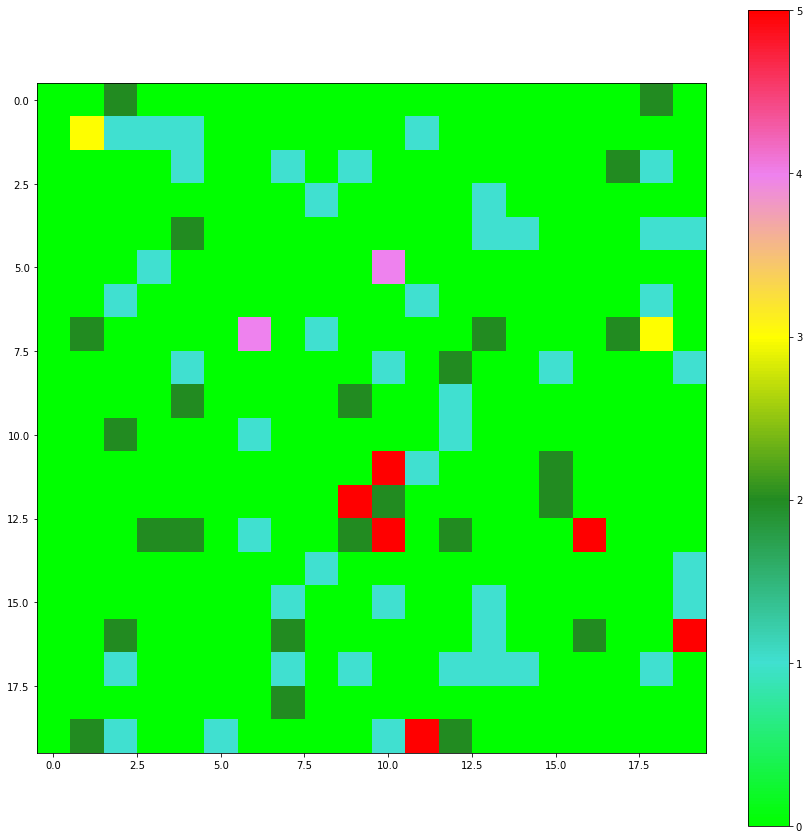

Echidna count :  4  Koala count :  2  Dingo count :  6

 ### TIMESTEP  13 ###
echidna moved to : [  2 1  ] tiredness :  1  hunger :  10
echidna sleeping at : [  1 1  ]
echidna successfully got food for hunger at position :  [7, 17]
echidna moved to : [  7 17  ] tiredness :  2  hunger :  1
koala moved to : [  6 11  ] tiredness :  6  hunger :  15
koala moved to : [  8 5  ] tiredness :  8  hunger :  7
dingo moved to : [  16 19  ] tiredness :  6  hunger :  3
dingo moved to : [  12 6  ] tiredness :  3  hunger :  12
dingo moved to : [  16 14  ] tiredness :  12  hunger :  27
dingo moved to : [  13 13  ] tiredness :  9  hunger :  18
dingo moved to : [  8 10  ] tiredness :  9  hunger :  12
dingo sleeping at : [  13 10  ]
echidna moved to : [  0 1  ] tiredness :  1  hunger :  1
dingo  is dead from hunger in position :  16 14


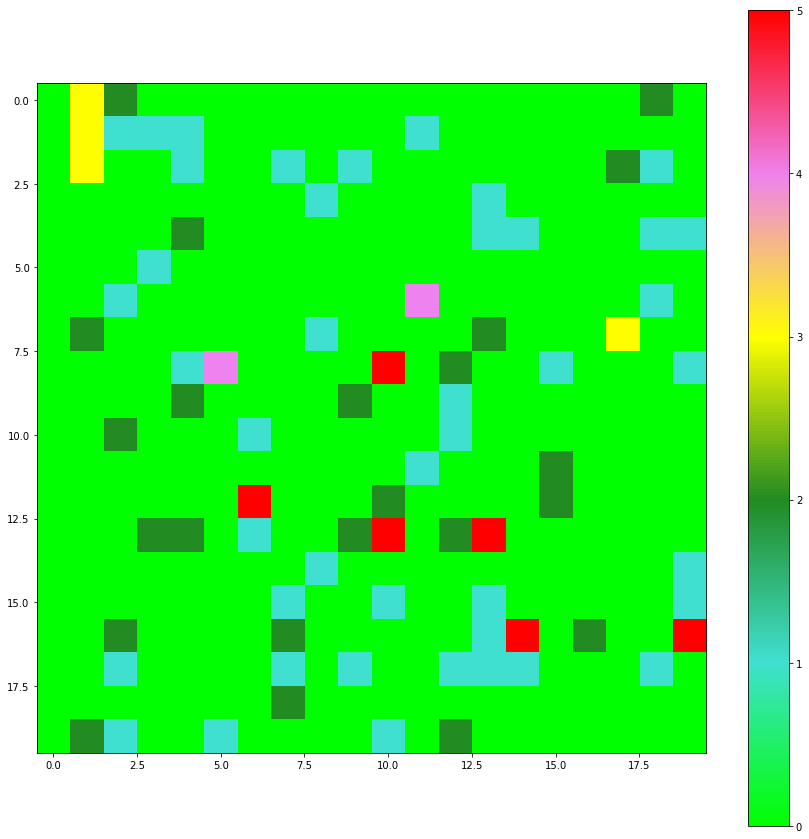

Echidna count :  4  Koala count :  2  Dingo count :  5

 ### TIMESTEP  14 ###
echidna moved to : [  2 2  ] tiredness :  2  hunger :  11
echidna moved to : [  2 1  ] tiredness :  1  hunger :  10
echidna moved to : [  8 17  ] tiredness :  3  hunger :  2
koala moved to : [  5 11  ] tiredness :  7  hunger :  16
koala moved to : [  7 4  ] tiredness :  10  hunger :  9
dingo moved to : [  19 19  ] tiredness :  9  hunger :  6
dingo moved to : [  12 9  ] tiredness :  6  hunger :  15
dingo sleeping at : [  13 13  ]
dingo sleeping at : [  8 10  ]
dingo moved to : [  16 7  ] tiredness :  6  hunger :  27
echidna moved to : [  1 1  ] tiredness :  2  hunger :  2
dingo  is dead from hunger in position :  16 7
a baby echidna is born at the position : [  1 1  ]


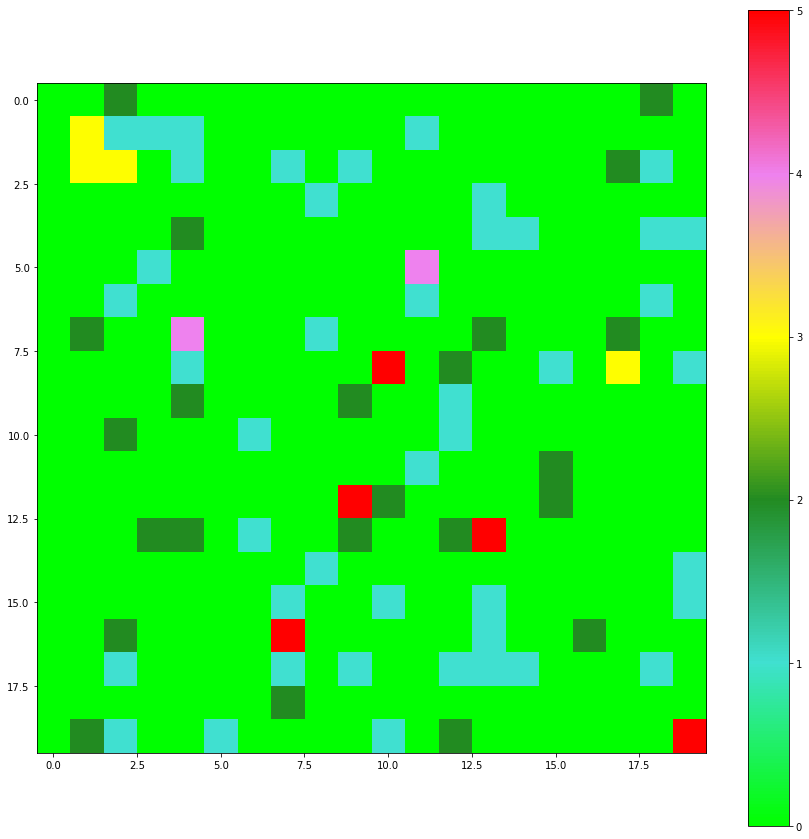

Echidna count :  5  Koala count :  2  Dingo count :  4

 ### TIMESTEP  15 ###
echidna moved to : [  3 2  ] tiredness :  3  hunger :  12
echidna moved to : [  1 1  ] tiredness :  2  hunger :  11
echidna moved to : [  9 17  ] tiredness :  4  hunger :  3
koala moved to : [  6 11  ] tiredness :  8  hunger :  17
koala sleeping at : [  7 4  ]
dingo sleeping at : [  19 19  ]
dingo moved to : [  15 9  ] tiredness :  9  hunger :  18
dingo moved to : [  10 13  ] tiredness :  3  hunger :  21
dingo moved to : [  11 7  ] tiredness :  6  hunger :  18
echidna moved to : [  0 1  ] tiredness :  3  hunger :  3
echidna moved to : [  2 1  ] tiredness :  1  hunger :  1
a baby echidna is born at the position : [  1 1  ]


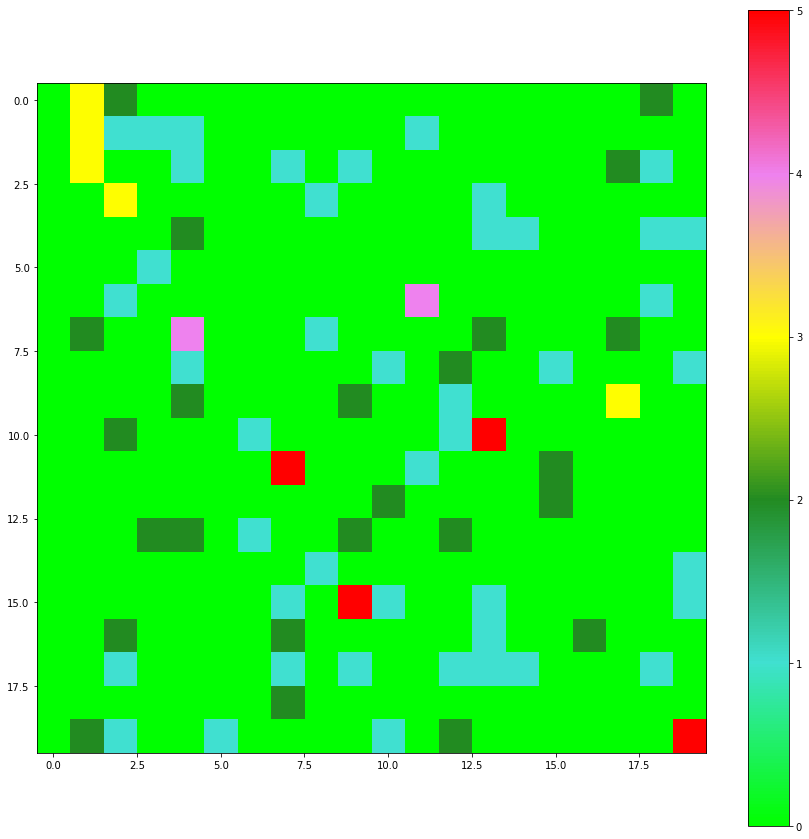

Echidna count :  6  Koala count :  2  Dingo count :  4

 ### TIMESTEP  16 ###
echidna moved to : [  4 2  ] tiredness :  4  hunger :  13
echidna moved to : [  1 2  ] tiredness :  3  hunger :  12
echidna moved to : [  8 17  ] tiredness :  5  hunger :  4
koala moved to : [  5 10  ] tiredness :  10  hunger :  19
koala moved to : [  8 5  ] tiredness :  2  hunger :  11
dingo moved to : [  19 19  ] tiredness :  0  hunger :  6
dingo sleeping at : [  15 9  ]
dingo moved to : [  7 10  ] tiredness :  9  hunger :  27
dingo moved to : [  8 7  ] tiredness :  9  hunger :  21
echidna moved to : [  0 1  ] tiredness :  3  hunger :  3
echidna moved to : [  1 1  ] tiredness :  2  hunger :  2
echidna moved to : [  2 1  ] tiredness :  1  hunger :  1
dingo  is dead from hunger in position :  7 10
a baby echidna is born at the position : [  1 2  ]
a baby echidna is born at the position : [  0 1  ]
a baby echidna is born at the position : [  1 1  ]
a baby echidna is born at the position : [  2 1  ]


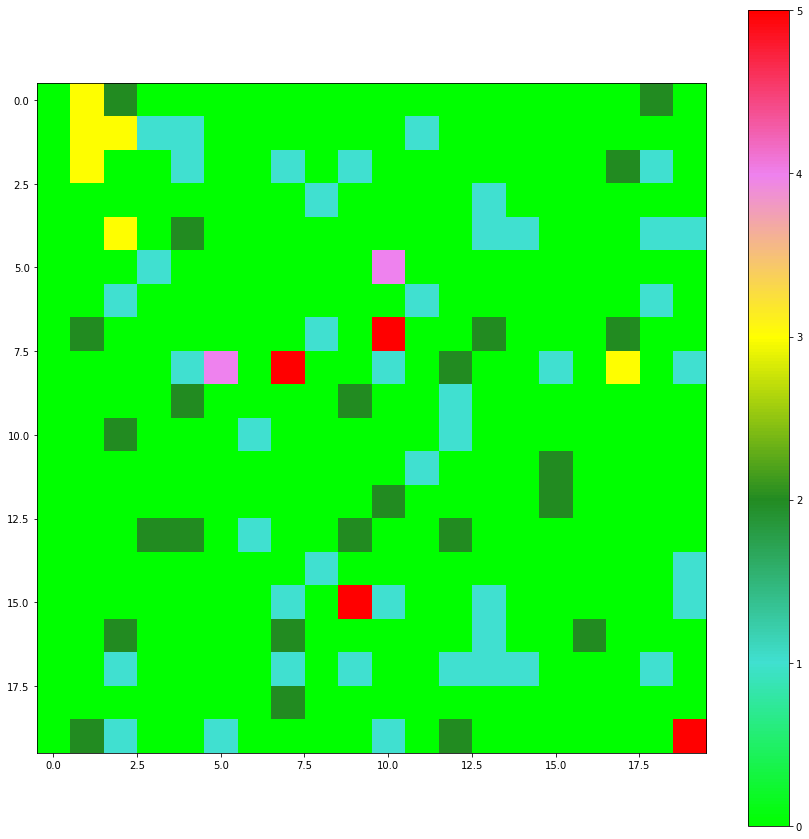

Echidna count :  10  Koala count :  2  Dingo count :  3

 ### TIMESTEP  17 ###
echidna moved to : [  5 2  ] tiredness :  5  hunger :  14
echidna successfully got food for hunger at position :  [0, 2]
echidna moved to : [  0 2  ] tiredness :  4  hunger :  1
echidna moved to : [  9 17  ] tiredness :  6  hunger :  5
koala sleeping at : [  5 10  ]
koala moved to : [  8 5  ] tiredness :  2  hunger :  11
dingo moved to : [  19 19  ] tiredness :  0  hunger :  6
dingo moved to : [  18 6  ] tiredness :  6  hunger :  24
dingo sleeping at : [  8 7  ]
echidna moved to : [  0 2  ] tiredness :  4  hunger :  4
echidna moved to : [  1 1  ] tiredness :  2  hunger :  2
echidna moved to : [  3 1  ] tiredness :  2  hunger :  2
echidna moved to : [  1 1  ] tiredness :  1  hunger :  1
echidna moved to : [  2 2  ] tiredness :  1  hunger :  1
echidna moved to : [  3 1  ] tiredness :  1  hunger :  1
echidna moved to : [  0 1  ] tiredness :  1  hunger :  1
dingo  is dead from hunger in position :  18 6
a baby e

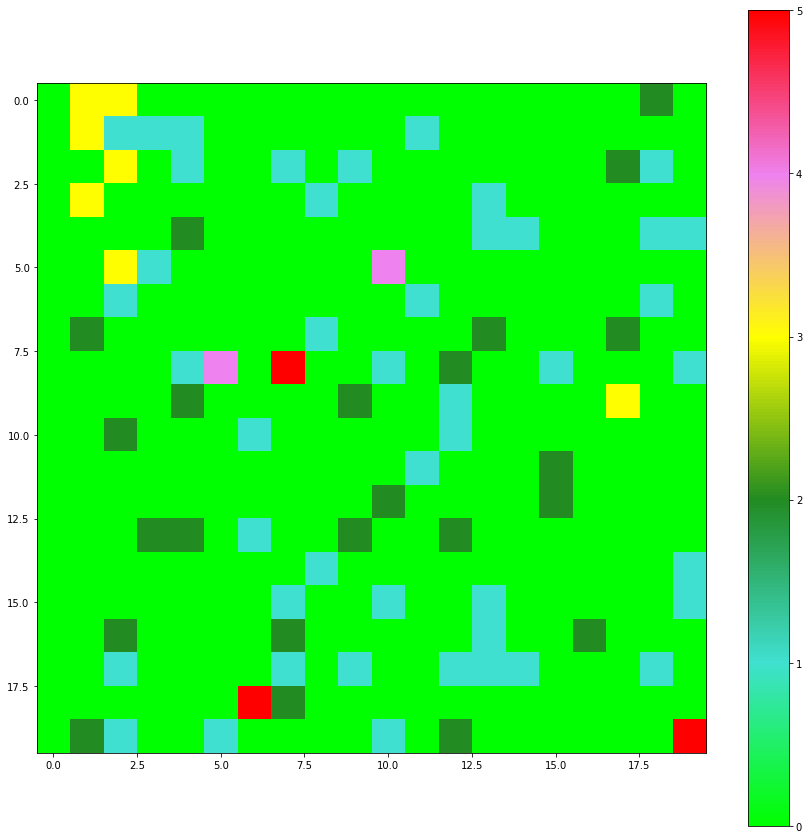

Echidna count :  11  Koala count :  2  Dingo count :  2

 ### TIMESTEP  18 ###
echidna moved to : [  4 2  ] tiredness :  6  hunger :  15
echidna moved to : [  0 2  ] tiredness :  4  hunger :  1
echidna moved to : [  8 17  ] tiredness :  7  hunger :  6
koala moved to : [  5 10  ] tiredness :  0  hunger :  19
koala moved to : [  8 6  ] tiredness :  3  hunger :  12
dingo moved to : [  16 16  ] tiredness :  6  hunger :  12
dingo moved to : [  5 7  ] tiredness :  3  hunger :  24
echidna moved to : [  1 2  ] tiredness :  5  hunger :  5
echidna moved to : [  0 1  ] tiredness :  3  hunger :  3
echidna moved to : [  3 1  ] tiredness :  2  hunger :  2
echidna moved to : [  2 1  ] tiredness :  2  hunger :  2
echidna moved to : [  3 2  ] tiredness :  2  hunger :  2
echidna moved to : [  2 1  ] tiredness :  2  hunger :  2
echidna moved to : [  0 1  ] tiredness :  1  hunger :  1
echidna moved to : [  3 2  ] tiredness :  1  hunger :  1
dingo  is dead from hunger in position :  5 7
a baby echidna is b

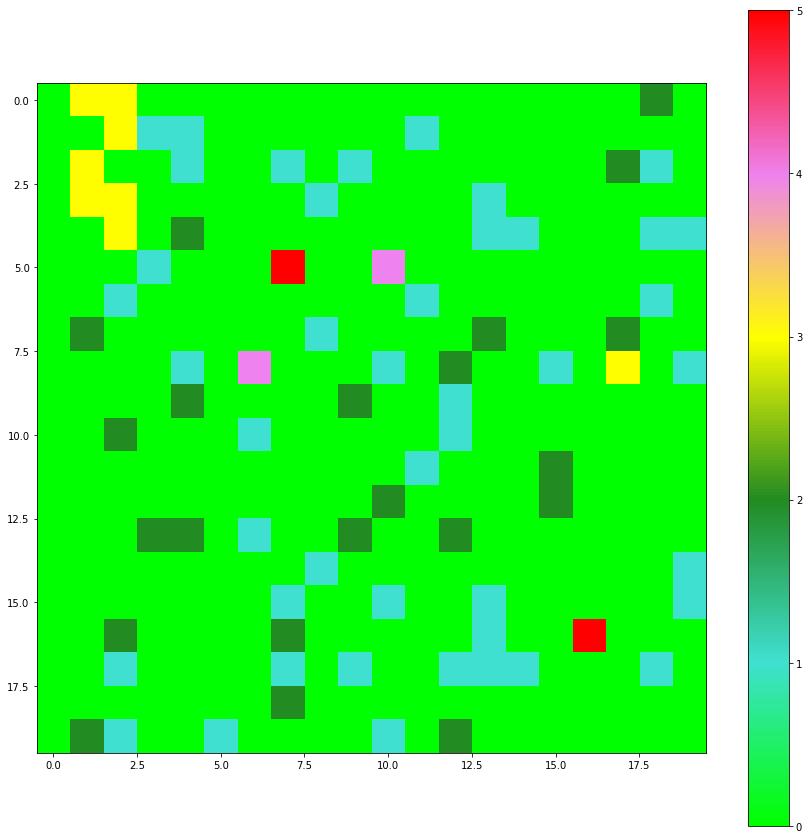

Echidna count :  17  Koala count :  2  Dingo count :  1
The world became unbalanced. The Total Ages Score :  18


In [ ]:
# Simulation
for score in range(STEPS):
    print("\n ### TIMESTEP ",score+1, "###")

# Move population - by one step (randomly) in x and y
    
    nextgrid = np.zeros((RMAX, CMAX), dtype=int)

    tree_p = [list(pair) for pair in zip(tree_l_r, tree_l_c)]
    dingo_r = []
    dingo_c = []
    for i in range(len(animal_type)):
        r = animal_position_r[i]
        c = animal_position_c[i]
        if (animal_type[i] == "dingo"):
            dingo_r.append(r)
            dingo_c.append(c)
    dingo_p = [list(pair) for pair in zip(dingo_r, dingo_c)]

    # water and tree sources
    for i in range(water_source):
        nextgrid[water_source_l_r[i],water_source_l_c[i]] = 1
        # print("Water Source at : [", water_source_l_r[i], water_source_l_c[i], "]")

    for i in range(tree):
        nextgrid[tree_l_r[i],tree_l_c[i]] = 2
        # print("Tree Food Source at : [", tree_l_r[i], tree_l_c[i], "]")

    #update position of every animal over steps
    for i in range(0,len(animal_type)):
        r = animal_position_r[i]
        c = animal_position_c[i]
        if(animal_travel[i]>=9):
            animal_travel[i]=0
            if (animal_type[i] == "echidna"):
                print("echidna sleeping at : [ ", r, c, " ]")
                nextgrid[r, c] = 3
            if (animal_type[i] == "koala"):
                print("koala sleeping at : [ ", r, c, " ]")
                nextgrid[r, c] = 4
            if (animal_type[i] == "dingo"):
                print("dingo sleeping at : [ ", r, c, " ]")
                nextgrid[r, c] = 5
        else:
            #different movement speed of different animal
            if (animal_type[i] == "echidna"):
                line_of_sight = [list(pair) for pair in zip([r+1, r, r-1, r], [c, c+1, c, c-1])]
                line_of_sight_trees = []
                line_of_sight_dingo = []
                for h in line_of_sight:
                    if h in dingo_p:
                        line_of_sight_dingo.append(h)
                if animal_hunger[i]>9:
                    for h in line_of_sight:
                        if h in tree_p:
                            line_of_sight_trees.append(h)
                if (len(line_of_sight_trees)):
                    print("echidna successfully got food for hunger at position : ",line_of_sight_trees[0])
                    animal_hunger[i] = 0
                    tr = line_of_sight_trees[0][0]
                    tc = line_of_sight_trees[0][1]
                    r = r - (r - tr)
                    c = c - (c - tc)
                elif (len(line_of_sight_dingo)):
                    print("echidna got frightened at position : ",line_of_sight_dingo[0])
                    dr = line_of_sight_dingo[0][0]
                    dc = line_of_sight_dingo[0][1]
                    r = r + (r - dr)
                    c = c + (c - dc)
                else:
                    ch_r = random.choice([-1, 0, 1])
                    r += ch_r
                    ch_c = 0
                    if(not ch_r):
                      ch_c = random.choice([-1, 0, 1])
                    c += ch_c
                
            if (animal_type[i] == "koala"):
                line_of_sight_r = [r+1, r, r-1, r]
                line_of_sight_c = [c, c+1, c, c-1]
                for j in range(len(line_of_sight_r)):
                    line_of_sight_r.append([line_of_sight_r[j]+1, line_of_sight_r[j], line_of_sight_r[j]-1, line_of_sight_r[j]])
                    line_of_sight_c.append([line_of_sight_c[j], line_of_sight_c[j]+1, line_of_sight_c[j], line_of_sight_c[j]-1])
                line_of_sight = [list(pair) for pair in zip(line_of_sight_r, line_of_sight_c)]
                line_of_sight_trees = []
                line_of_sight_dingo = []
                for h in line_of_sight:
                    if h in dingo_p:
                        line_of_sight_dingo.append(h)
                if animal_hunger[i]>9:
                    for h in line_of_sight:
                        if h in tree_p:
                            line_of_sight_trees.append(h)
                if (len(line_of_sight_trees)):
                    print("echidna successfully got food for hunger at position : ",line_of_sight_trees[0])
                    animal_hunger[i] = 0
                    tr = line_of_sight_trees[0][0]
                    tc = line_of_sight_trees[0][1]
                    r = r - (r - tr)
                    c = c - (c - tc)
                elif (len(line_of_sight_dingo)):
                    print("echidna got frightened at position : ",line_of_sight_dingo[0])
                    dr = line_of_sight_dingo[0][0]
                    dc = line_of_sight_dingo[0][1]
                    r = r + (r - dr)
                    c = c + (c - dc)
                else:
                    r += random.choice([-1, 0, 1])
                    c += random.choice([-1, 0, 1])
            if (animal_type[i] == "dingo"):
                r += random.choice([-3, 0, 3])
                c += random.choice([-3, 0, 3])

                
            if r <= -1:
                r = 0
            if c <= -1:
                c = 0
            if r >= RMAX:
                r = RMAX - 1
            if c >= CMAX:
                c = CMAX - 1


            #updated status
            animal_travel[i] += abs(r - animal_position_r[i]) + abs(c - animal_position_c[i])
            animal_hunger[i] += abs(r - animal_position_r[i]) + abs(c - animal_position_c[i])

            if (animal_type[i] == "echidna"):
                print("echidna moved to : [ ", r, c, " ] tiredness : ",animal_travel[i]," hunger : ",animal_hunger[i])
                nextgrid[r, c] = 3
            if (animal_type[i] == "koala"):
                print("koala moved to : [ ", r, c, " ] tiredness : ",animal_travel[i]," hunger : ",animal_hunger[i])
                nextgrid[r, c] = 4
            if (animal_type[i] == "dingo"):
                print("dingo moved to : [ ", r, c, " ] tiredness : ",animal_travel[i]," hunger : ",animal_hunger[i])
                nextgrid[r, c] = 5
            #updated position
            animal_position_r[i] = r
            animal_position_c[i] = c

    #death
    death_index=set()
    for i in range(0,len(animal_type)):
        if(animal_type[i]=="dingo"):
            r=animal_position_r[i]
            c=animal_position_c[i]
            for j in range(0,len(animal_type)):
                if(animal_type[j]!="dingo" and animal_position_r[j]>=r-1 and animal_position_r[j]<=r+1 and animal_position_c[j]>=c-1 and animal_position_c[j]<=c+1):
                    print (animal_type[j]," in position : ",animal_position_r[j], animal_position_c[j]," is dead by dingo from position : ",r, c)
                    death_index.add(j)
                    animal_hunger[i] = 0
                    break
        if(animal_hunger[i]>22):
            print (animal_type[i]," is dead from hunger in position : ",r, c)
            death_index.add(i)
    for j in death_index:
        del animal_type[j]
        del animal_position_r[j]
        del animal_position_c[j]
        del animal_travel[j]
        del animal_hunger[j]

    # Reproduction - 10% chance random.random() <= 0.1 of reproducing +1 to pop in cell
    born_index=set()
    for i in range(0,len(animal_type)):
        r=animal_position_r[i]
        c=animal_position_c[i]
        for j in range(0, len(animal_type)):
            if (i!=j and animal_type[j] == animal_type[i] and animal_position_r[j] >= r-1 and animal_position_r[j] <= r+1 and animal_position_c[j] >= c-1 and animal_position_c[j] <= c+1):
                if(animal_type[i]=="echidna"):
                    if(random.random() <= 0.15):
                        born_index.add(i)
                        print("a baby echidna is born at the position : [ ",r, c," ]")
                        break
                if (animal_type[i] == "koala"):
                    if (random.random() <= 0.13):
                        born_index.add(i)
                        print("a baby koala is born at the position : [ ", r, c, " ]")
                        break
                if (animal_type[i] == "dingo"):
                    if (random.random() <= 0.10):
                        born_index.add(i)
                        print("a baby dingo is born at the position : [ ", r, c, " ]")
                        break

    for j in born_index:
        animal_type.append(animal_type[j])
        animal_position_r.append(animal_position_r[j])
        animal_position_c.append(animal_position_c[j])
        animal_travel.append(0)
        animal_hunger.append(0)
                    # Update grid
                    
    popgrid = nextgrid

    # Plot current population as array (could also use scatter plot)
    #print(popgrid)
    plt.figure(figsize=(15,15))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lime","turquoise","forestgreen","yellow","violet","red"])
    plt.imshow(popgrid, cmap=cmap)   # Note plt origin is top left 
    snapshots.append(popgrid)
    plt.colorbar()
    plt.show()

    echidna_count=0
    koala_count=0
    dingo_count=0
    for i in range(0,len(animal_type)):
        if(animal_type[i]=="echidna"):
            echidna_count +=1
        if (animal_type[i] == "koala"):
            koala_count += 1
        if (animal_type[i] == "dingo"):
            dingo_count += 1
    print("Echidna count : ",echidna_count," Koala count : ",koala_count," Dingo count : ",dingo_count)

    if(echidna_count<2 or koala_count<2 or dingo_count<2):
        print("The world became unbalanced. The Total Ages Score : ", score+1)
        break

    if(echidna_count>100 or koala_count>100 or dingo_count>100):
        print("The world became unbalanced. The Total Ages Score : ", score+1)
        break
    
# if __name__ == "__main__":
#     main()

In [ ]:
len(snapshots)

19

....................Done!
.

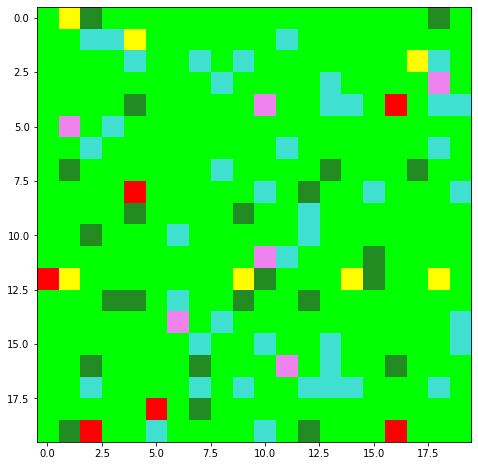

In [ ]:
import matplotlib.animation as animation


fps = 1
nSeconds = len(snapshots)
# snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lime","turquoise","forestgreen","yellow","violet","red"])
im = plt.imshow(a, cmap=cmap)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')

In [ ]:
import os 
os.getcwd()
os.listdir(os.getcwd())



from IPython.display import HTML
from base64 import b64encode

video_path = 'test_anim.mp4'

mp4 = open(video_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video height=500 width=800 controls><source src="{data_url}" type="video/mp4">
</video>""")

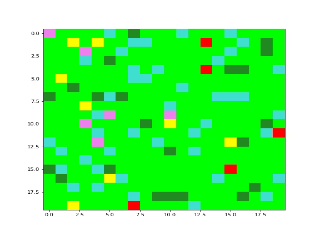

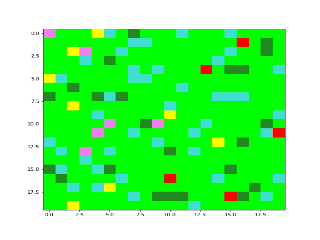

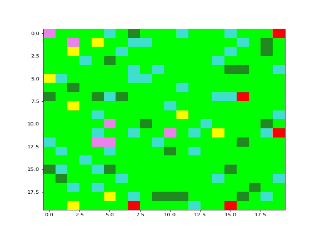

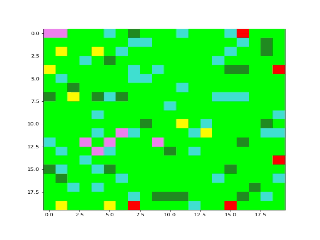

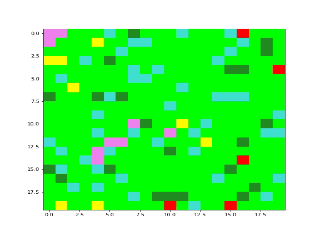

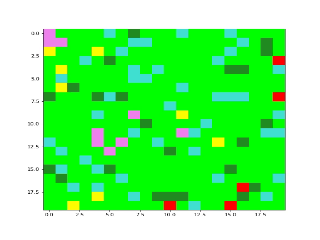

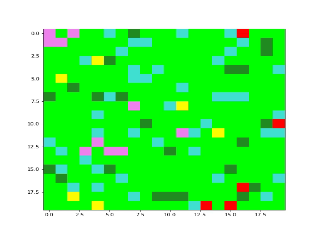

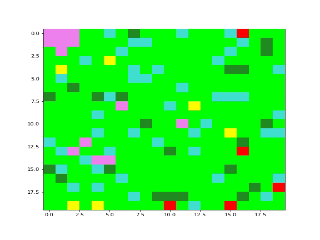

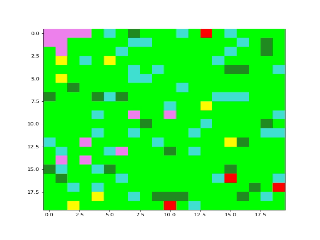

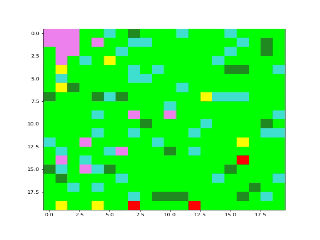

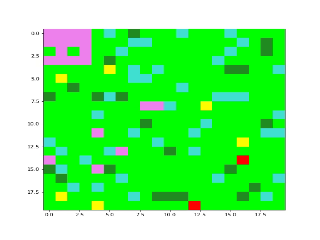

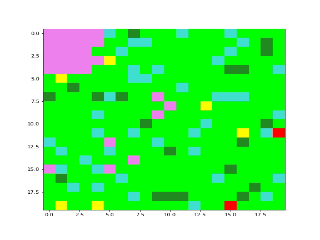

In [ ]:
# importing libraries
import cv2
from google.colab.patches import cv2_imshow



# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture(os.path.join('test_anim.mp4'))
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video  file")
   
# Read until video is completed
while(cap.isOpened()):
      
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
   
    frame = cv2.resize(frame, (320, 240))
    # Display the resulting frame
    #cv2.imshow('Frame', frame)
    cv2_imshow(frame)

   
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
   
  # Break the loop
  else: 
    break
   
# When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()